In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

C:\Users\parag\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df=pd.read_csv("MonthWiseMarketArrivals_Clean.csv")

In [4]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,city,state,date
0,ABOHAR(PB),January,2005,2350,404,493,446,ABOHAR,PB,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,ABOHAR,PB,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,ABOHAR,PB,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,ABOHAR,PB,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,ABOHAR,PB,January-2012


In [5]:
df.date=pd.DatetimeIndex(df.date)

In [6]:
df2010 = df[df.year == 2010]
df2010Bang = df[(df.year == 2010) & (df.city == 'BANGALORE')]

In [7]:
df2010City = df2010.groupby(['city'], as_index=False).quantity.sum()

In [8]:
df2010City = df2010City.sort_values(by = "quantity", ascending = False)
df2010City.head()

,city,quantity
6,BANGALORE,6079067
16,DELHI,3508582
39,KOLKATA,3495320
56,PUNE,3326024
67,SOLAPUR,3310419


In [9]:
%matplotlib inline

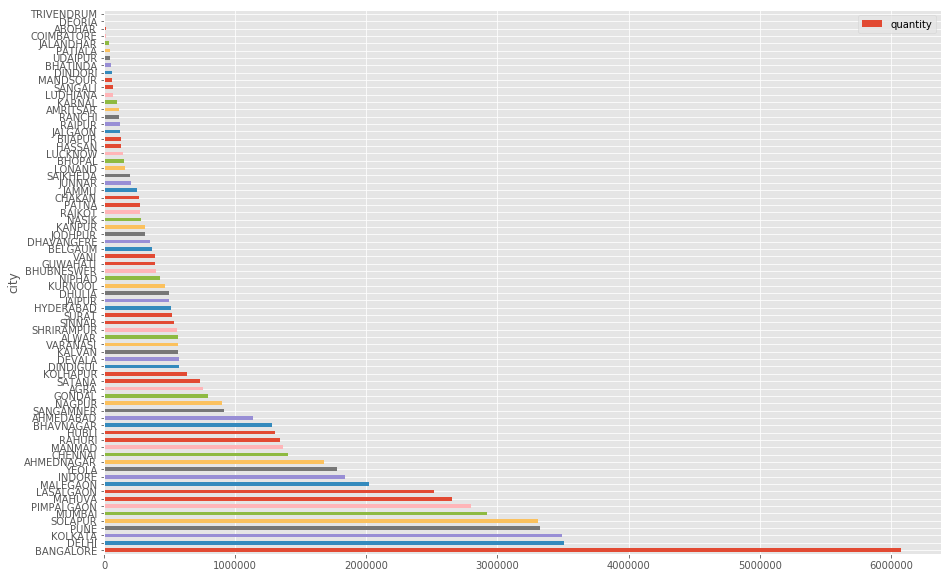

In [10]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
df2010City.plot(kind ="barh", x = 'city', y = 'quantity')

In [11]:
dfBang = df[df.city == 'BANGALORE']
dfBang = dfBang.sort_values(by = "date")
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,city,state,date
716,BANGALORE,January,2004,227832,916,1066,991,BANGALORE,KNT,2004-01-01
729,BANGALORE,February,2004,225133,741,870,793,BANGALORE,KNT,2004-02-01
742,BANGALORE,March,2004,221952,527,586,556,BANGALORE,KNT,2004-03-01
754,BANGALORE,April,2004,185150,419,518,465,BANGALORE,KNT,2004-04-01
766,BANGALORE,May,2004,137390,400,516,455,BANGALORE,KNT,2004-05-01


In [12]:
pd.set_option('precision', 0)

In [13]:
dfBang.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146,1e+02,146,146,146
mean,2010,5e+05,558,1314,1044
std,4,3e+05,381,911,668
min,2004,6e+04,145,338,320
25%,2007,3e+05,307,685,551
50%,2010,4e+05,448,1019,836
75%,2013,7e+05,653,1636,1326
max,2016,2e+06,2377,4698,3430


In [14]:
dfBang.index = pd.PeriodIndex(dfBang.date, freq='M')

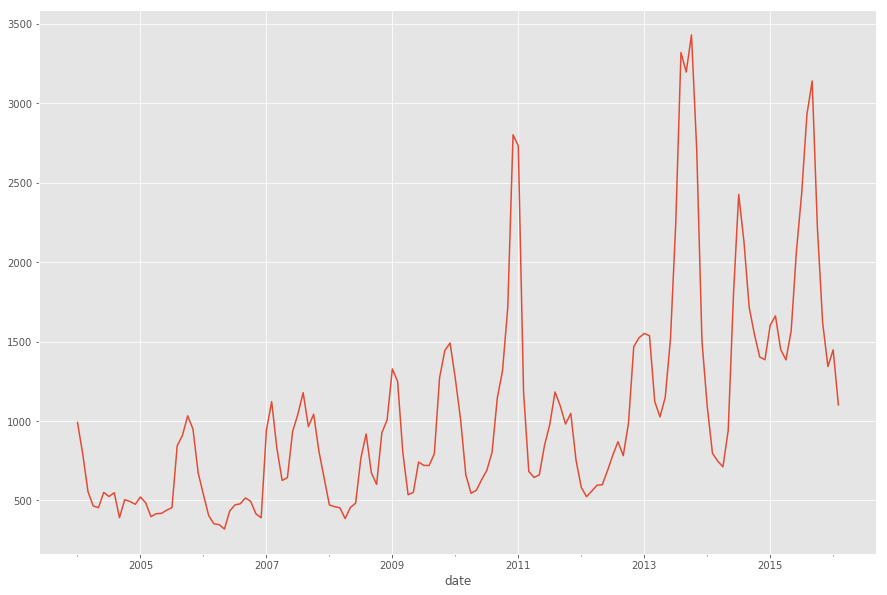

In [15]:
dfBang.priceMod.plot()

In [16]:
dfBang["diff"]=dfBang.priceMax-dfBang.priceMin
dfBang['monthVal'] = pd.DatetimeIndex(dfBang['date']).month

In [17]:
dfBangPivot = pd.pivot_table(dfBang, values = "diff", 
                             columns = "year", index = "monthVal")

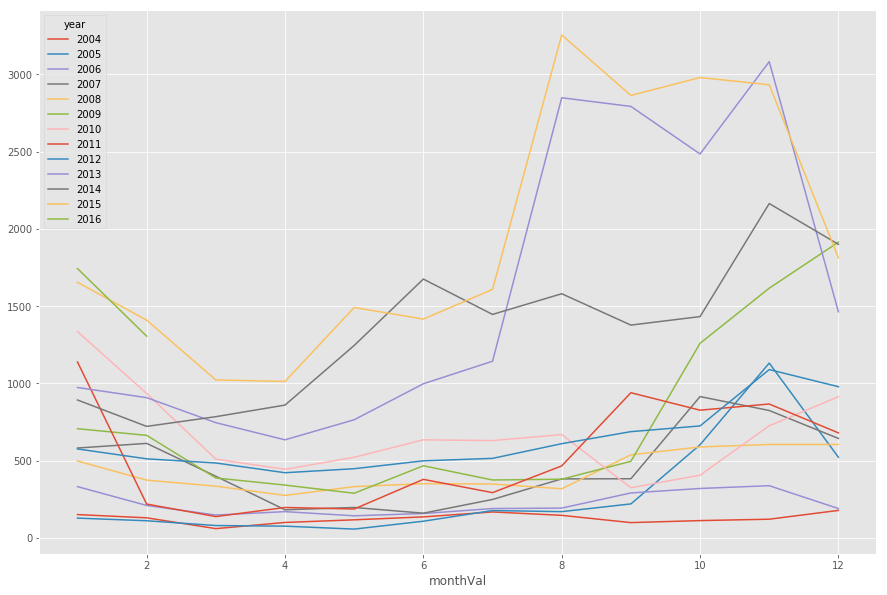

In [18]:
dfBangPivot.plot()

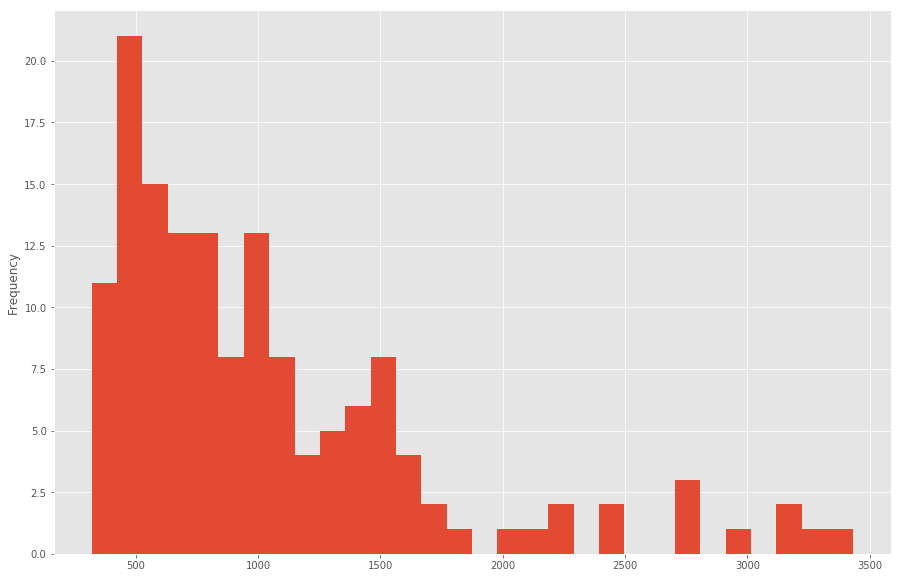

In [19]:
dfBang.priceMod.plot(kind = "hist", bins = 30)

In [20]:
dfBang['priceModLog'] = np.log(dfBang.priceMod)
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,city,state,date,diff,monthVal,priceModLog
date,,,,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,BANGALORE,KNT,2004-01-01,150,1,7
2004-02,BANGALORE,February,2004,225133,741,870,793,BANGALORE,KNT,2004-02-01,129,2,7
2004-03,BANGALORE,March,2004,221952,527,586,556,BANGALORE,KNT,2004-03-01,59,3,6
2004-04,BANGALORE,April,2004,185150,419,518,465,BANGALORE,KNT,2004-04-01,99,4,6
2004-05,BANGALORE,May,2004,137390,400,516,455,BANGALORE,KNT,2004-05-01,116,5,6


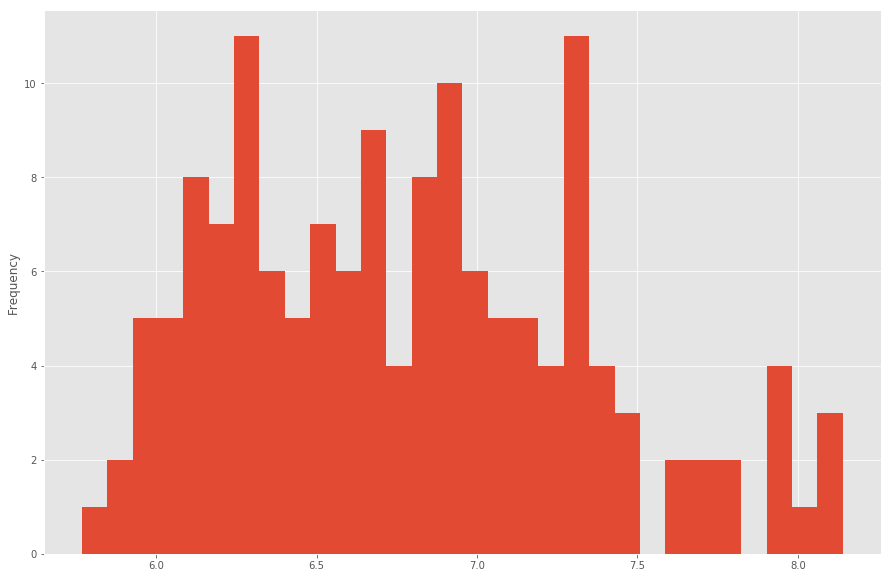

In [21]:
dfBang.priceModLog.plot(kind = "hist", bins = 30)

In [22]:
model_mean_pred = dfBang.priceModLog.mean()
dfBang["priceMean"] = np.exp(model_mean_pred)

C:\Users\parag\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


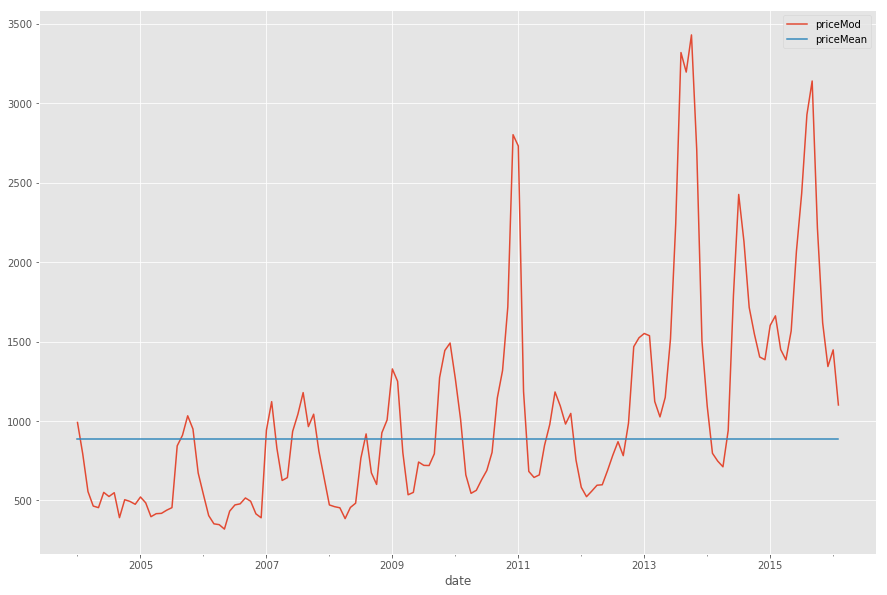

In [23]:
dfBang.plot(kind="line", x="date", y = ["priceMod", "priceMean"])

In [24]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [25]:
model_mean_RMSE = RMSE(dfBang.priceMean, dfBang.priceMod)
model_mean_RMSE

683.9533483996255

In [26]:
dfBangResults = pd.DataFrame(columns = ["Model", "Forecast", "RMSE"])
dfBangResults.loc[0,"Model"] = "Mean"
dfBangResults.loc[0,"Forecast"] = np.exp(model_mean_pred)
dfBangResults.loc[0,"RMSE"] = model_mean_RMSE
dfBangResults.head()

,Model,Forecast,RMSE
0,Mean,9e+02,7e+02


In [35]:
dfBang["timeIndex"] = dfBang.date - dfBang.date.min()
dfBang["timeIndex"] =  dfBang["timeIndex"]/np.timedelta64(1, 'M')
dfBang["timeIndex"] = dfBang["timeIndex"].round(0).astype(int)

In [36]:
model_linear = smf.ols('priceModLog ~ timeIndex', data = dfBang).fit()

In [38]:
model_linear.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            priceModLog   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     139.8
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           5.75e-23
Time:                        10:31:47   Log-Likelihood:                -72.317
No. Observations:                 146   AIC:                             148.6
Df Residuals:                     144   BIC:                             154.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1121      0.066     92.830      0.000       5.982       6.242
timeIndex      0.0093      0.001     11.823      0.000       0.008       0.011
==============================================================================
Omnibus:                        4.750   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.739
Skew:                           0.405   Prob(JB):                       0.0935
Kurtosis:                       2.648   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# model_linear.params
model_linear_pred = model_linear.predict()

In [45]:
model_linear_pred

array([6.11210813, 6.12139074, 6.13067334, 6.13995594, 6.14923855,
       6.15852115, 6.16780376, 6.17708636, 6.18636896, 6.19565157,
       6.20493417, 6.21421678, 6.22349938, 6.23278198, 6.24206459,
       6.25134719, 6.2606298 , 6.2699124 , 6.279195  , 6.28847761,
       6.29776021, 6.30704282, 6.31632542, 6.32560802, 6.33489063,
       6.34417323, 6.35345583, 6.36273844, 6.37202104, 6.38130365,
       6.39058625, 6.39986885, 6.40915146, 6.41843406, 6.42771667,
       6.43699927, 6.44628187, 6.45556448, 6.46484708, 6.47412969,
       6.48341229, 6.49269489, 6.5019775 , 6.5112601 , 6.52054271,
       6.52982531, 6.53910791, 6.54839052, 6.55767312, 6.56695572,
       6.57623833, 6.58552093, 6.59480354, 6.60408614, 6.61336874,
       6.62265135, 6.63193395, 6.64121656, 6.65049916, 6.65978176,
       6.66906437, 6.67834697, 6.68762958, 6.69691218, 6.70619478,
       6.71547739, 6.72475999, 6.7340426 , 6.7433252 , 6.7526078 ,
       6.76189041, 6.77117301, 6.78045561, 6.78973822, 6.79902

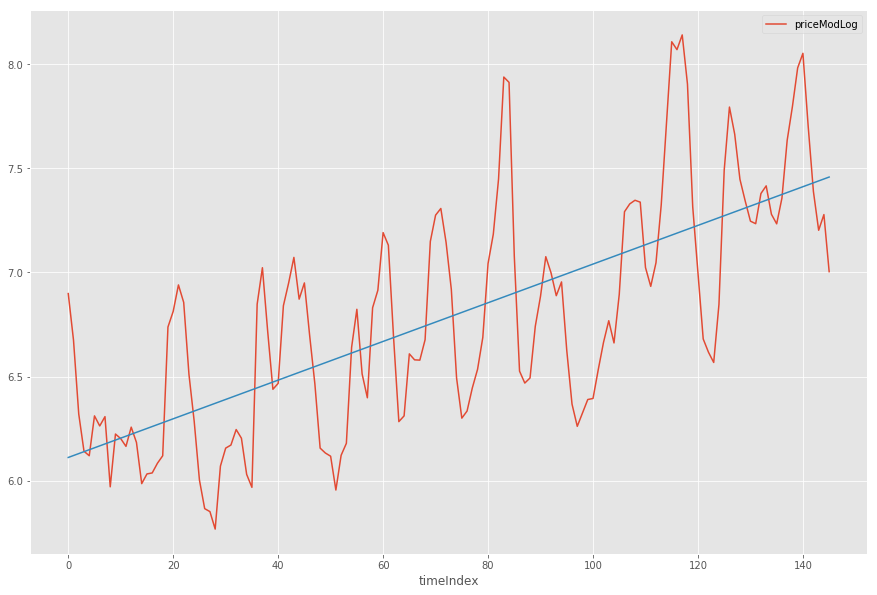

In [46]:
dfBang.plot(kind="line", x="timeIndex", y = "priceModLog")
plt.plot(dfBang.timeIndex,model_linear_pred, '-')

In [47]:
dfBang["priceLinear"] = np.exp(model_linear_pred)

In [48]:
model_linear_RMSE = RMSE(dfBang.priceLinear, dfBang.priceMod)
model_linear_RMSE

518.523607584147

C:\Users\parag\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


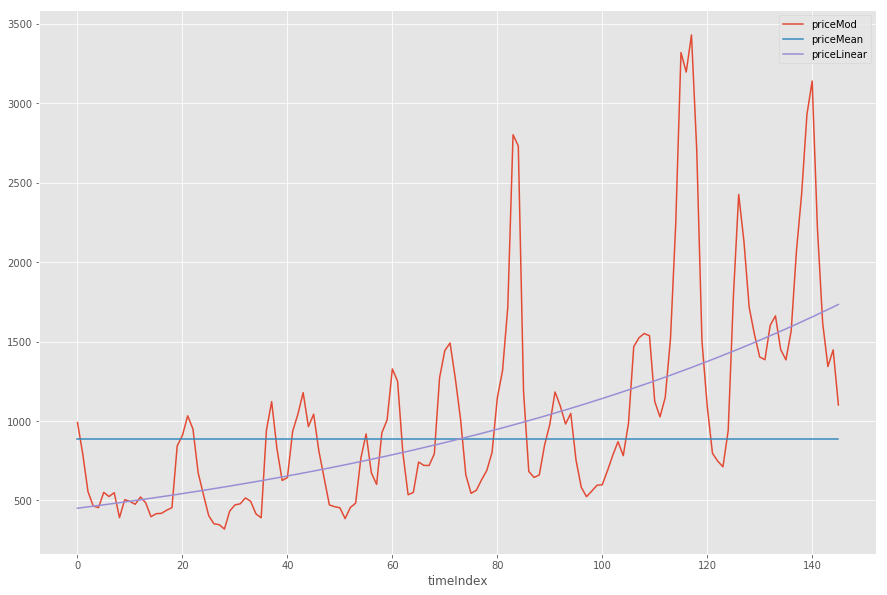

In [50]:
dfBang.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear"])